In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Base Risco de crédito

In [2]:
import pickle
with open('risco_credito.pkl','rb') as f:
#atribituos previsores e valores das classes
    x_risco_credito, y_risco_credito = pickle.load(f)

In [3]:
x_risco_credito
#atributos relacionados com a história de crédito, dívida, garantia e renda. Com isso, o objetivo é
#fazer a previsão da variável y_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [4]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [5]:
#criando a árvore de decisão 
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')

#fazer o treinamento. Os dados vão se encaixar ao algorítimo

arvore_risco_credito.fit(x_risco_credito,y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [6]:
arvore_risco_credito.feature_importances_

#retorna a importância de cada um dos atributos(ganho de informação)

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

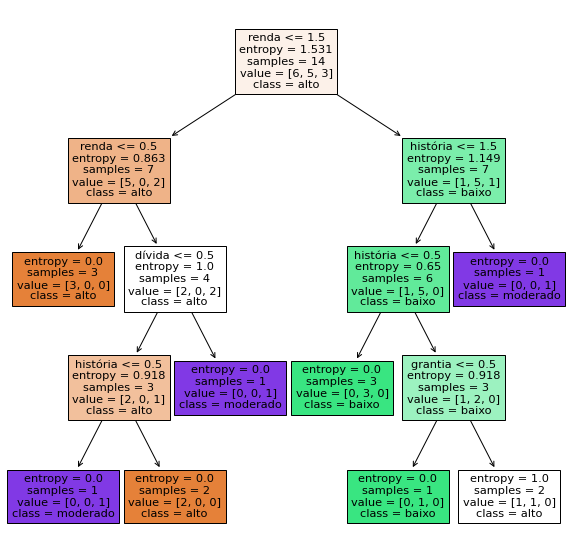

In [7]:
from sklearn import tree
previsores = ['história', 'dívida', 'grantia', 'renda']
figura,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
tree.plot_tree(arvore_risco_credito,feature_names=previsores,class_names=arvore_risco_credito.classes_,filled=True);

Base credit data

In [8]:
with open('credit.pkl','rb') as f:
    x_risco_credito_treinamento, y_risco_credito_treinamento, x_risco_credito_teste, y_risco_credito_teste = pickle.load(f)

x_risco_credito_treinamento.shape, y_risco_credito_treinamento.shape
y_risco_credito_treinamento


array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
from sklearn import preprocessing

In [10]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_risco_credito_treinamento)

In [11]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
#fazer o treinamento 
arvore_credit.fit(x_risco_credito_treinamento,training_scores_encoded)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
previsoes = arvore_credit.predict(x_risco_credito_teste)
previsoes
# 1 pessoa não pagou o emprestimo, 0 a pessoa pagou o empréstimo

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [13]:
#comparar com as respostas reais

y_risco_credito_teste

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [14]:
from sklearn.metrics import accuracy_score,classification_report

In [15]:
accuracy_score(y_risco_credito_teste,previsoes)

0.982

0.982

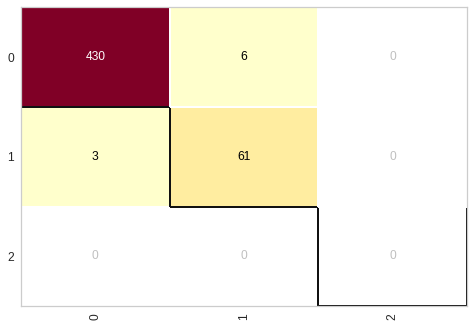

In [16]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_credit)
cm.fit(x_risco_credito_teste,y_risco_credito_treinamento)
cm.score(x_risco_credito_teste,y_risco_credito_teste)

In [17]:
print(classification_report(y_risco_credito_teste,previsoes))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       436
         1.0       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



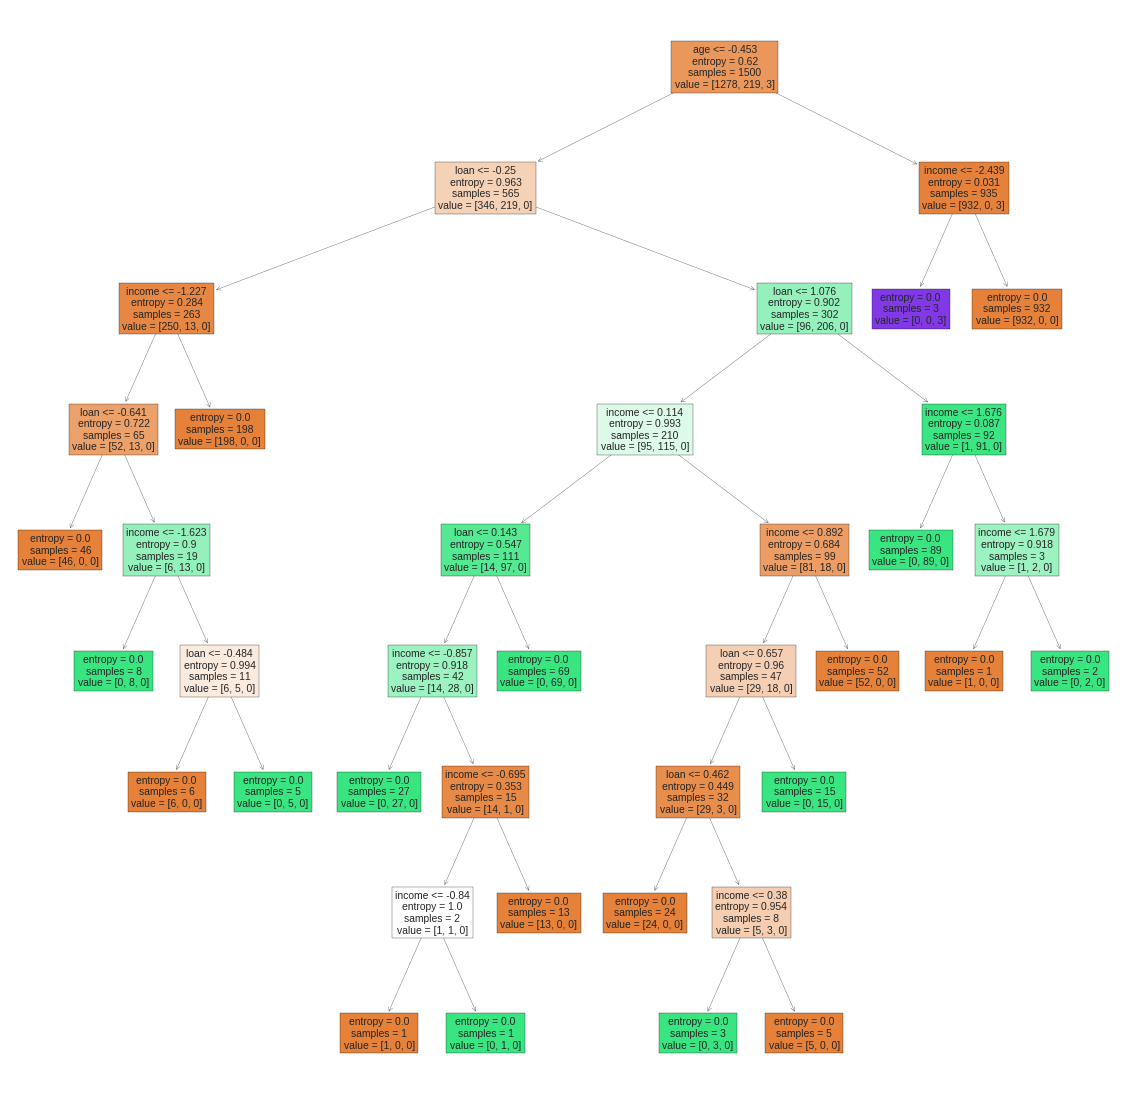

In [18]:
from sklearn import tree
previsores = ['income','age','loan']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(20,20))
tree.plot_tree(arvore_credit,feature_names=previsores,filled=True);


Base de dados Cebsus

In [19]:
with open('census.pkl','rb') as f:
    x_census_treinamento, y_census_treinamento,x_census_teste,y_census_teste = pickle.load(f)

In [21]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [24]:
arvore_census = DecisionTreeClassifier(criterion='entropy',random_state=0)
#fazer o treinamento
arvore_census.fit(x_census_treinamento, y_census_treinamento)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
#fazer as previsões
previsoes=arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [27]:
y_census_teste


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [28]:
accuracy_score(y_census_teste,previsoes)

0.8104401228249745

0.8104401228249745

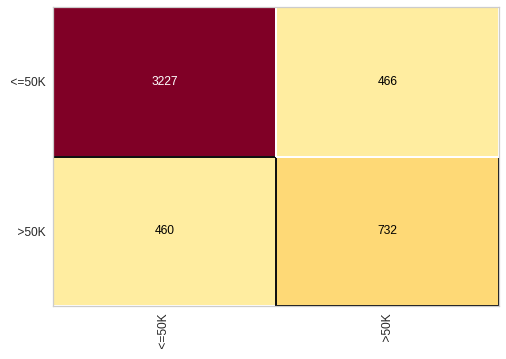

In [29]:
#matrix de confusão

from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)


In [30]:
print(classification_report(y_census_teste,previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

